<a href="https://colab.research.google.com/github/preritt/Embed/blob/master/EpochBasedSatimReducedDataset04202019_ADAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import packages

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
import tensorflow as tf

In [0]:
# Load data
train_data = np.load('X_train.npy')
train_label = np.load('y_train.npy')
validation_data = np.load('X_validation.npy')
validation_label = np.load('y_validation.npy')
test_data = np.load('X_test.npy')
test_label = np.load('y_test.npy')

In [3]:
# Visualize data
train_data_pandas = pd.DataFrame(train_data)
train_data_labels = pd.DataFrame(train_label)
train_data_pandas.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.601267,-1.288475,-0.051051,-0.409032,0.260482,-0.277124,0.102922,-0.210252,-0.037423,0.029499,0.104416,0.165190,-0.154018,-0.061375,0.052261,0.129714,-0.016616,-0.022097,0.105699,-0.111762
1,0.895830,-1.888285,-0.036854,-0.006050,0.119070,-0.008976,0.108056,-0.022527,-0.028848,0.170903,-0.083485,-0.051184,0.041117,-0.055565,0.047334,-0.059557,-0.045411,0.093592,0.036876,-0.028558
2,-0.996519,-0.587328,-0.309866,-0.343356,0.891381,0.339134,-0.161639,0.052494,-0.160554,0.038198,0.066820,-0.026711,0.028572,0.016461,0.058724,-0.003362,-0.075539,0.138385,-0.012593,-0.001673
3,0.647370,-1.245622,-0.166432,0.515280,0.105636,0.183723,0.182418,-0.132266,-0.315006,0.097930,0.056246,0.337317,0.024939,-0.048987,-0.013325,-0.015493,-0.031741,-0.270518,-0.104466,0.078826
4,0.077101,-1.052330,-0.259343,0.584375,0.466714,0.471585,-0.144931,0.281123,-0.052295,0.255867,-0.050871,-0.083271,-0.078085,0.001341,-0.195125,-0.020316,0.041219,0.029217,0.142422,-0.079658


In [4]:
train_data_labels.head()

,0
0,5
1,5
2,5
3,5
4,5


In [5]:
test_data.shape

(2000, 20)

In [6]:
validation_data.shape

(1331, 20)

#### Combine Validation and train data for MLP classifier - and set validation fraction to 4500/15000 = 0.3

In [7]:
train_valid_combined = np.concatenate((train_data, validation_data))
train_valid_combined.shape

(4435, 20)

In [0]:
train_valid_label = np.concatenate((train_label, validation_label))


#### Fit MLP Classifier

In [0]:
# clf = MLPClassifier(hidden_layer_sizes=(104),validation_fraction=0.3)
# clf.fit(train_data, train_label)

In [10]:
20*90/36

50.0

In [11]:
clf =MLPClassifier(hidden_layer_sizes=(50, ), max_iter=200, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-5, random_state=1,
                    learning_rate_init=.1)

# Test set score: 0.950119

# clf.fit(train_valid_combined, train_valid_label)
clf.fit(train_data, train_label)

Iteration 1, loss = 0.95074262
Iteration 2, loss = 0.40768669
Iteration 3, loss = 0.36785070
Iteration 4, loss = 0.34458895
Iteration 5, loss = 0.33250029
Iteration 6, loss = 0.32492560
Iteration 7, loss = 0.31602461
Iteration 8, loss = 0.31022870
Iteration 9, loss = 0.30321219
Iteration 10, loss = 0.29668668
Iteration 11, loss = 0.29259674
Iteration 12, loss = 0.28981648
Iteration 13, loss = 0.28237008
Iteration 14, loss = 0.27676422
Iteration 15, loss = 0.27355262
Iteration 16, loss = 0.26758509
Iteration 17, loss = 0.26467467
Iteration 18, loss = 0.25851363
Iteration 19, loss = 0.25696537
Iteration 20, loss = 0.25395678
Iteration 21, loss = 0.24893087
Iteration 22, loss = 0.24532578
Iteration 23, loss = 0.24379364
Iteration 24, loss = 0.24156889
Iteration 25, loss = 0.23882958
Iteration 26, loss = 0.23914027
Iteration 27, loss = 0.23457658
Iteration 28, loss = 0.23173433
Iteration 29, loss = 0.23054574
Iteration 30, loss = 0.22734081
Iteration 31, loss = 0.22742927
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='sgd', tol=1e-05,
       validation_fraction=0.1, verbose=10, warm_start=False)

#### Train Accuracy

In [12]:
clf.score(train_data,train_label)

0.958118556701031

#### Validation Accuracy

In [13]:
clf.score(validation_data,validation_label)

0.8812922614575507

#### Test accuracy

In [14]:
clf.score(test_data,test_label)

0.895

#### Tensorflow model using weights initialized from numpy model

In [0]:
enc = OneHotEncoder(handle_unknown='ignore',sparse=False)
enc.fit(train_label.reshape(1,-1).T)
train_label_one_hot = enc.transform(train_label.reshape(-1,1))
test_label_one_hot = enc.transform(test_label.reshape(-1,1))
validation_label_one_hot = enc.transform(validation_label.reshape(-1,1))
validation_test_label_one_hot = enc.transform(train_valid_label.reshape(-1,1))

In [0]:
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]
    
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [0]:
# hid_neuron = [90]

In [18]:
test_label_one_hot.shape

(2000, 6)

#### Base NN model in tensor flow

#### 36 -> 90 -> 6

## Train baseline model in tensorflow

In [0]:
#

In [20]:
train_data.shape

(3104, 20)

In [0]:
def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random_normal(shape=size, stddev=xavier_stddev, seed=1000)

In [0]:
output_shape = train_label_one_hot.shape[1]

In [23]:
## Define weights of the layer

G_W1 = tf.Variable(np.float32(clf.coefs_[0]))
G_b1 = tf.Variable(np.float32(clf.intercepts_ [0]))

G_W2 =  tf.Variable(np.float32(clf.coefs_[1]))
G_b2 = tf.Variable(np.float32(clf.intercepts_ [1]))


saver = tf.train.Saver()

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# tf.train.GradientDescentOptimizer

In [0]:
## Building the graph - Best!
saver = tf.train.Saver()
learning_rate = 0.001
hid_neuron = [374]
num_steps = 20000
batch_size = 200
train_losses = []
test_acc = []
X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
#     layer_2 = tf.matmul(layer_1, G_W2) + G_b2
#     layer_2 = tf.nn.relu(layer_2)
    out_layer = tf.matmul(layer_1, G_W2) + G_b2
    layer_outputs.append(out_layer)
    return out_layer

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X), labels=Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)

train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net(X), 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

  ### Initialization and running the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    best_accuracy_valid = 0
    for step in range(0, num_steps):
        batch_x, batch_y = next_batch(batch_size, train_data, train_label_one_hot)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % 1000 == 0:
            train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
            print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
            train_losses.append(train_loss)
            validation_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
            if step%1000 == 0:
              print("Validation Accuracy {} ...".format(validation_accuracy))
              print()
              if (validation_accuracy >= best_accuracy_valid):
                best_accuracy_valid = validation_accuracy
                saver.save(sess, './statlog_letter')
                test_Accuracy = sess.run(accuracy*100, feed_dict={X: test_data,Y:test_label_one_hot})
    print("Test acc=",str(test_Accuracy), "%")
    print("Valid acc=",str(best_accuracy_valid), "%")

    print("="*50)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

step 0, training loss= 0.09654394, training acc= 96.49999737739563%
Validation Accuracy 88.58000946044922 ...

step 1000, training loss= 0.074345045, training acc= 97.50000238418579%
Validation Accuracy 88.65514373779297 ...

step 2000, training loss= 0.0795926, training acc= 99.00000095367432%
Validation Accuracy 88.80540466308594 ...

step 3000, training loss= 0.09808998, training acc= 97.00000286102295%
Validation Accuracy 88.80540466308594 ...

step 4000, training loss= 0.07493803, training acc= 97.50000238418579%
Validation Accuracy 88.80540466308594 ...

step 5000, training loss= 0.095866315, training acc= 97.00000286102295%
Validation Accuracy 88.80540466308594 ...

step 6000, training loss= 0.07703011, training acc= 98.00000190734863%
Validation Accuracy 88.80540466308594 ...

step 7000, tr

#### My model with feedback

## Divide valid in two parts for validation and validation-test¶

In [25]:
print(validation_data.shape)
print(train_data.shape)

(1331, 20)
(3104, 20)


In [0]:
valid_validation_data = validation_data[0:1000,:]
valid_validation_data_label = validation_label_one_hot[0:1000,:]
valid_test_data = validation_data[1000:,:]
valid_test_data_label = validation_label_one_hot[1000:,:]

In [0]:
output_shape = train_label_one_hot.shape[1]

In [0]:
## Define weights of the layer
G_W1 = tf.Variable(np.float32(clf.coefs_[0]))
G_b1 = tf.Variable(np.float32(clf.intercepts_ [0]))

G_W2 =  tf.Variable(np.float32(clf.coefs_[1]))
G_b2 = tf.Variable(np.float32(clf.intercepts_ [1]))

num_hidden_neurons = 50
GwLoop = tf.Variable(xavier_init([output_shape,num_hidden_neurons]))
G_bLoop = tf.Variable(tf.zeros(shape=[num_hidden_neurons]))

GwLoop2 = tf.Variable(xavier_init([num_hidden_neurons,num_hidden_neurons]))
G_bLoop2 = tf.Variable(tf.zeros(shape=[num_hidden_neurons]))

GLossW = tf.Variable(xavier_init([output_shape,output_shape]))
GLossb= tf.Variable(tf.zeros(shape=[output_shape]))
saver = tf.train.Saver()

In [0]:
valid_validation_data = validation_data[0:1000,:]
valid_validation_data_label = validation_label_one_hot[0:1000,:]
valid_test_data = validation_data[1000:,:]
valid_test_data_label = validation_label_one_hot[1000:,:]

In [30]:
valid_validation_data_label

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [0]:
# plt.scatter(np.argmax(valid_validation_data_label,axis = 0))

(array([262.,   0.,  89.,   0., 152.,   0., 103.,   0., 165., 229.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

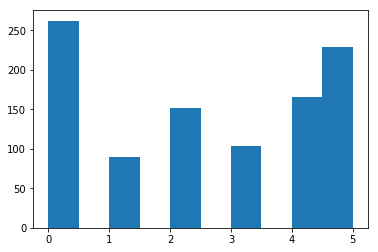

In [32]:
plt.hist(np.argmax(valid_validation_data_label,axis = 1))

In [33]:
train_data.shape

(3104, 20)

## Hyperparameter tuning

In [43]:

## Building the graph
# saver = tf.train.Saver()
# hid_neuron = [90]
num_steps = 30000
batch_size = 2056
train_losses = []
test_acc = []
plot_every = 100
number_of_epoch = 4000
# learning_rate = 0.001
lr = tf.placeholder(tf.float32, shape = [])
number_of_ex = train_data.shape[0]

total_steps_for_one_pass = number_of_ex//batch_size + 1


X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
weights = {
    'h1': tf.Variable(np.float32(clf.coefs_[0])),
    'out': tf.Variable(np.float32(clf.coefs_[1]))
}
biases = {
    'b1': tf.Variable(np.float32(clf.intercepts_ [0])),
    'out': tf.Variable(np.float32(clf.intercepts_ [1]))
}
saver = tf.train.Saver()
W_track = []
ValidAccuracy_Track = []
ValidAccuracy_Test_track = []
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
    out_layer = tf.matmul(layer_1, G_W2) + G_b2
    layer_outputs.append(out_layer)
    for loop in range(0,2):        
        layer1_feedback1 = tf.add(tf.matmul(out_layer, GwLoop), G_bLoop)
        layer1_feedback1 = tf.nn.relu(layer1_feedback1)
        layer1_feedback2 = tf.add(tf.matmul(layer1_feedback1, GwLoop2), G_bLoop2)
        layer1_feedback2 = tf.nn.tanh(layer1_feedback2)
        layer_1 = layer_1 + layer1_feedback2 + tf.add(tf.matmul(x, G_W1), G_b1)
        out_layer = (tf.matmul(layer_1, G_W2) + G_b2) + tf.nn.tanh((tf.matmul(out_layer, GLossW) + GLossb))
        layer_outputs.append(out_layer)
    if train == True:
        return layer_outputs
    else:
        return layer_outputs[0]
    
for wL1 in range(1,7):
  for WL2 in range(1,wL1+1):
    for WL3 in range(0,2):

        wLoss1 = wL1
        wLoss2 = WL2
        wLoss3 = WL3
        loss1 = wLoss1*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[0], labels=Y))
        loss2 = wLoss2*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[1], labels=Y))
        loss3 = wLoss3*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[2], labels=Y))

        loss = (loss1+loss2+loss3)/(wLoss1+ wLoss2 + wLoss3)
        optimizer = tf.train.AdamOptimizer(learning_rate=lr)

        train_op = optimizer.minimize(loss)
        correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

        ### Initialization and running the model
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            best_accuracy_valid = 0
            for ep in range(0,number_of_epoch):
              if ep<1000:
                learn = .001
              elif ep >=1000 and ep <= 2000:
                learn = .001
              else:
                learn = .0001
              for step in range(0, total_steps_for_one_pass):

                if step>=number_of_ex//batch_size:
                  batch_x, batch_y = train_data[step*batch_size:,:],train_label_one_hot[step*batch_size:,:]
#                   print(step,'Finishing',step*batch_size )
                  step = 0
#                   print('finishing')

                else:

                  start = step*batch_size
                  finish = (step+1)*batch_size
#                   print(step,'Doing', 'Start = ', start, "Finish = ", finish)
                  batch_x, batch_y = train_data[step:finish,:],train_label_one_hot[step:finish,:]
        #         batch_x, batch_y = next_batch(batch_size, combined_train_valid, combined_train_valid_label)
                sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, lr: learn})              



  #                 batch_x, batch_y = next_batch(batch_size, train_data, train_label_one_hot)
  #                 sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
              if ep % plot_every == 0:
                  train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
                  print("epoch " + str(ep) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
                  train_losses.append(train_loss)
                  validation_accuracy = sess.run(accuracy*100, feed_dict={X: valid_validation_data,Y:valid_validation_data_label})
                  if ep%plot_every == 0:
                    print("Validation Accuracy valid {} ...".format(validation_accuracy))
                    print()
                    if (validation_accuracy >= best_accuracy_valid):
                      best_accuracy_valid = validation_accuracy
                      saver.save(sess, './statimgTrackAdam')
                      G_W1np, G_b1np, G_W2np, G_b2np = sess.run([G_W1, G_b1, G_W2, G_b2])
            print("Valid acc=",str(best_accuracy_valid), "%")
            ValidAccuracy_Track.append(best_accuracy_valid)
            this_params = G_W1np, G_b1np, G_W2np, G_b2np
            W_track.append(this_params)
            # code for checking accuracy of valid_test
            validation_test_accuracy = sess.run(accuracy*100, feed_dict={X: valid_test_data,Y:valid_test_data_label})
            ValidAccuracy_Test_track.append(validation_test_accuracy)
            print("Validation Accuracy Test {} ...".format(validation_test_accuracy))
            print("="*50)
            print("W1 = {} ...".format(wLoss1))
            print("W2 = {} ...".format(wLoss2))
            print("W3 = {} ...".format(wLoss3))

            print("*"*50)
            print("="*50)


epoch 0, training loss= 0.6358842, training acc= 96.37404680252075%
Validation Accuracy valid 90.20000457763672 ...

epoch 100, training loss= 0.068768576, training acc= 97.2328245639801%
Validation Accuracy valid 89.4000015258789 ...

epoch 200, training loss= 0.05676273, training acc= 96.94656729698181%
Validation Accuracy valid 89.30000305175781 ...

epoch 300, training loss= 0.051263094, training acc= 97.04198241233826%
Validation Accuracy valid 89.5 ...

epoch 400, training loss= 0.047038663, training acc= 97.13740348815918%
Validation Accuracy valid 89.9000015258789 ...

epoch 500, training loss= 0.04352328, training acc= 97.13740348815918%
Validation Accuracy valid 90.30000305175781 ...

epoch 600, training loss= 0.04067651, training acc= 97.32824563980103%
Validation Accuracy valid 90.10000610351562 ...

epoch 700, training loss= 0.038240712, training acc= 97.42366671562195%
Validation Accuracy valid 90.10000610351562 ...

epoch 800, training loss= 0.036144484, training acc= 97

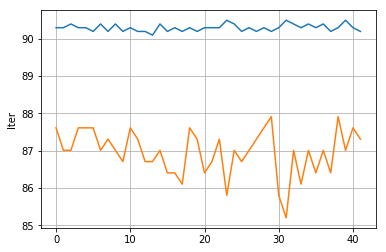

In [44]:
import matplotlib.pyplot as plt
plt.plot(ValidAccuracy_Track)
plt.plot(ValidAccuracy_Test_track)

plt.ylabel('Iter')
plt.grid(abs)
plt.show()

In [45]:
print(np.max(ValidAccuracy_Track))
print(np.argmax(ValidAccuracy_Track))

90.5
23


#### Best Wt 5,2,1

In [0]:
shuffling_indices_validation_data = np.random.permutation(validation_data.shape[0])

In [0]:
shuffled_validation_data = validation_data[shuffling_indices_validation_data,:]
shuffled_validation_label = validation_label_one_hot[shuffling_indices_validation_data,:]
train_valid_combined_shuffled = np.concatenate((train_data, shuffled_validation_data))
train_valid_combined_shuffled_label = np.concatenate((train_label_one_hot, shuffled_validation_label))


(array([291.,   0.,  95.,   0., 163.,   0., 109.,   0., 176., 497.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

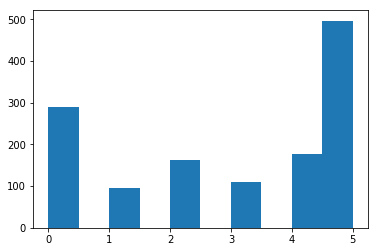

In [48]:
plt.hist(np.argmax(validation_label_one_hot,axis = 1))

In [0]:
# # keep aside 
# aside_examples= 300
# aside_valid_test = train_valid_combined_shuffled[-aside_examples:]
# aside_valid_test_label = train_valid_combined_shuffled_label[-aside_examples:]
# combined_train_valid = train_valid_combined_shuffled[:train_valid_combined.shape[0]-aside_examples,:]
# combined_train_valid_label = train_valid_combined_shuffled_label[:train_valid_combined.shape[0]-aside_examples,:]

In [0]:
# keep aside 
aside_examples= 400
aside_valid_test = train_valid_combined_shuffled[-aside_examples:]
aside_valid_test_label = train_valid_combined_shuffled_label[-aside_examples:]
combined_train_valid = train_valid_combined_shuffled[:train_valid_combined.shape[0]-aside_examples,:]
combined_train_valid_label = train_valid_combined_shuffled_label[:train_valid_combined.shape[0]-aside_examples,:]

In [51]:
## 123 Building the graph - Best!
saver = tf.train.Saver()
number_of_ex = combined_train_valid.shape[0]
hid_neuron = [104]
num_steps = 150000
# num_steps = 20000
number_of_epoch = 20000
batch_size = 2056
# batch_size = train_data.shape[0]

train_losses = []
test_acc = []
train_accuracy = []
val_accuracy = []
plot_every = 1000
best_accuracy_valid = 0
learning_rate = 0.001
track_step = []
tracked_valid_accuracy = []
total_steps_for_one_pass = number_of_ex//batch_size + 1
step = 0
X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
lr = tf.placeholder(tf.float32, shape = [])
W_track = []
ValidAccuracy_Track = []
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
    out_layer = tf.matmul(layer_1, G_W2) + G_b2
    layer_outputs.append(out_layer)
    for loop in range(0,2):        
        layer1_feedback1 = tf.add(tf.matmul(out_layer, GwLoop), G_bLoop)
        layer1_feedback1 = tf.nn.relu(layer1_feedback1)
        layer1_feedback2 = tf.add(tf.matmul(layer1_feedback1, GwLoop2), G_bLoop2)
        layer1_feedback2 = tf.nn.tanh(layer1_feedback2)
        layer_1 = layer_1 + layer1_feedback2 + tf.add(tf.matmul(x, G_W1), G_b1)
        out_layer = (tf.matmul(layer_1, G_W2) + G_b2) + tf.nn.tanh((tf.matmul(out_layer, GLossW) + GLossb))
        layer_outputs.append(out_layer)
    if train == True:
        return layer_outputs
    else:
        return layer_outputs[0]



wLoss1 = 5
wLoss2 = 2
wLoss3 = 1
loss1 = wLoss1*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[0], labels=Y))
loss2 = wLoss2*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[1], labels=Y))
loss3 = wLoss3*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[2], labels=Y))

loss = (loss1+loss2+loss3)/(wLoss1+ wLoss2 + wLoss3)


optimizer = tf.train.AdamOptimizer(learning_rate=lr)

train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Initialization and running the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    best_accuracy_valid = 0
    for ep in range(0,number_of_epoch):
      if ep<1000:
        learn = .001
      elif ep >=1000 and ep <= 2000:
        learn = .001
      else:
        learn = .0001
      for step in range(0, total_steps_for_one_pass):
#         print(step)
#         if (step>5000):
#           plot_every = 10
        
        if step>=number_of_ex//batch_size:
          batch_x, batch_y = combined_train_valid[step*batch_size:,:],combined_train_valid_label[step*batch_size:,:]
#           print(step,'Finishing',step*batch_size )
          step = 0
          
        else:
          
          start = step*batch_size
          finish = (step+1)*batch_size
#           print(step,'Doing', 'Start = ', start, "Finish = ", finish)
          batch_x, batch_y = combined_train_valid[step:finish,:],combined_train_valid_label[step:finish,:]
#         batch_x, batch_y = next_batch(batch_size, combined_train_valid, combined_train_valid_label)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, lr: learn})
      if ep % plot_every == 0:
          train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
#             train_accuracy.append(train_acc)
#             print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
          track_step.append(step)
          train_loss_total, train_acc_total = sess.run([loss, accuracy], feed_dict={X: combined_train_valid,Y: combined_train_valid_label})
          train_accuracy.append(train_acc_total)
          train_losses.append(train_loss_total)
          print("epoch " + str(ep) + ", training loss Total= " + str(train_loss_total) +", training acc total= "+str(train_acc_total*100)+"%")
          validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
          print("ValidTest acc=",str(validationTest_accuracy), "%")
          tracked_valid_accuracy.append(validationTest_accuracy)
          if ep%plot_every == 0:
            if (validationTest_accuracy >= best_accuracy_valid):
              best_accuracy_valid = validationTest_accuracy
              saver.save(sess, './statlog_letterReducedSGD')
              G_W1np, G_b1np, G_W2np, G_b2np = sess.run([G_W1, G_b1, G_W2, G_b2])
  #         if(train_loss_total<0.033881765):
  #           break
                                         
    validationValid_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
    print("ValidValid acc=",str(validationValid_accuracy), "%")
    
    validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
    print("ValidTest acc=",str(validationTest_accuracy), "%")
    this_params = G_W1np, G_b1np, G_W2np, G_b2np
    W_track.append(this_params)
#     saver.save(sess, './statlog_letterAdam')
    print("="*50)
    print("W1")
    print(wLoss1)

    print("W2")
    print(wLoss2)
    print("*"*50)
    
    print("="*50)

epoch 0, training loss Total= 0.76537657, training acc total= 94.29987668991089%
ValidTest acc= 87.25 %
epoch 1000, training loss Total= 0.0747761, training acc total= 96.25774621963501%
ValidTest acc= 88.0 %
epoch 2000, training loss Total= 0.052054297, training acc total= 97.24907279014587%
ValidTest acc= 87.75 %
epoch 3000, training loss Total= 0.049848042, training acc total= 97.37298488616943%
ValidTest acc= 88.0 %
epoch 4000, training loss Total= 0.047155544, training acc total= 97.62081503868103%
ValidTest acc= 88.25 %
epoch 5000, training loss Total= 0.044354632, training acc total= 97.74473309516907%
ValidTest acc= 88.5 %
epoch 6000, training loss Total= 0.04150033, training acc total= 97.91821837425232%
ValidTest acc= 88.5 %
epoch 7000, training loss Total= 0.03888306, training acc total= 98.0916976928711%
ValidTest acc= 88.75 %
epoch 8000, training loss Total= 0.03649634, training acc total= 98.26517701148987%
ValidTest acc= 88.75 %
epoch 9000, training loss Total= 0.0342790

#### fine tune for higher precision for no. epochs

In [52]:
## 123 Building the graph - Best!
saver = tf.train.Saver()
number_of_ex = combined_train_valid.shape[0]
hid_neuron = [104]
num_steps = 150000
# num_steps = 20000
number_of_epoch = 10000
batch_size = 2056
# batch_size = train_data.shape[0]

train_losses = []
test_acc = []
train_accuracy = []
val_accuracy = []
plot_every = 100
best_accuracy_valid = 0
learning_rate = 0.001
track_step = []
tracked_valid_accuracy = []
total_steps_for_one_pass = number_of_ex//batch_size + 1
step = 0
X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
lr = tf.placeholder(tf.float32, shape = [])
W_track = []
ValidAccuracy_Track = []
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
    out_layer = tf.matmul(layer_1, G_W2) + G_b2
    layer_outputs.append(out_layer)
    for loop in range(0,2):        
        layer1_feedback1 = tf.add(tf.matmul(out_layer, GwLoop), G_bLoop)
        layer1_feedback1 = tf.nn.relu(layer1_feedback1)
        layer1_feedback2 = tf.add(tf.matmul(layer1_feedback1, GwLoop2), G_bLoop2)
        layer1_feedback2 = tf.nn.tanh(layer1_feedback2)
        layer_1 = layer_1 + layer1_feedback2 + tf.add(tf.matmul(x, G_W1), G_b1)
        out_layer = (tf.matmul(layer_1, G_W2) + G_b2) + tf.nn.tanh((tf.matmul(out_layer, GLossW) + GLossb))
        layer_outputs.append(out_layer)
    if train == True:
        return layer_outputs
    else:
        return layer_outputs[0]



wLoss1 = 5
wLoss2 = 2
wLoss3 = 1
loss1 = wLoss1*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[0], labels=Y))
loss2 = wLoss2*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[1], labels=Y))
loss3 = wLoss3*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[2], labels=Y))

loss = (loss1+loss2+loss3)/(wLoss1+ wLoss2 + wLoss3)


optimizer = tf.train.AdamOptimizer(learning_rate=lr)

train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Initialization and running the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    best_accuracy_valid = 0
    for ep in range(0,number_of_epoch):
      if ep<1000:
        learn = .001
      elif ep >=1000 and ep <= 2000:
        learn = .001
      else:
        learn = .0001
      for step in range(0, total_steps_for_one_pass):
#         print(step)
#         if (step>5000):
#           plot_every = 10
        
        if step>=number_of_ex//batch_size:
          batch_x, batch_y = combined_train_valid[step*batch_size:,:],combined_train_valid_label[step*batch_size:,:]
#           print(step,'Finishing',step*batch_size )
          step = 0
          
        else:
          
          start = step*batch_size
          finish = (step+1)*batch_size
#           print(step,'Doing', 'Start = ', start, "Finish = ", finish)
          batch_x, batch_y = combined_train_valid[step:finish,:],combined_train_valid_label[step:finish,:]
#         batch_x, batch_y = next_batch(batch_size, combined_train_valid, combined_train_valid_label)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, lr: learn})
      if ep % plot_every == 0:
          train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
#             train_accuracy.append(train_acc)
#             print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
          track_step.append(step)
          train_loss_total, train_acc_total = sess.run([loss, accuracy], feed_dict={X: combined_train_valid,Y: combined_train_valid_label})
          train_accuracy.append(train_acc_total)
          train_losses.append(train_loss_total)
          print("epoch " + str(ep) + ", training loss Total= " + str(train_loss_total) +", training acc total= "+str(train_acc_total*100)+"%")
          validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
          print("ValidTest acc=",str(validationTest_accuracy), "%")
          tracked_valid_accuracy.append(validationTest_accuracy)
          if ep%plot_every == 0:
            if (validationTest_accuracy >= best_accuracy_valid):
              best_accuracy_valid = validationTest_accuracy
              saver.save(sess, './statlog_letterReducedSGD')
              G_W1np, G_b1np, G_W2np, G_b2np = sess.run([G_W1, G_b1, G_W2, G_b2])
  #         if(train_loss_total<0.033881765):
  #           break
                                         
    validationValid_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
    print("ValidValid acc=",str(validationValid_accuracy), "%")
    
    validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
    print("ValidTest acc=",str(validationTest_accuracy), "%")
    this_params = G_W1np, G_b1np, G_W2np, G_b2np
    W_track.append(this_params)
#     saver.save(sess, './statlog_letterAdam')
    print("="*50)
    print("W1")
    print(wLoss1)

    print("W2")
    print(wLoss2)
    print("*"*50)
    
    print("="*50)

epoch 0, training loss Total= 0.76537657, training acc total= 94.29987668991089%
ValidTest acc= 87.25 %
epoch 100, training loss Total= 0.17020664, training acc total= 94.69640851020813%
ValidTest acc= 88.0 %
epoch 200, training loss Total= 0.13298558, training acc total= 94.8698878288269%
ValidTest acc= 88.0 %
epoch 300, training loss Total= 0.11637167, training acc total= 95.14250159263611%
ValidTest acc= 88.0 %
epoch 400, training loss Total= 0.10546729, training acc total= 95.31598687171936%
ValidTest acc= 88.0 %
epoch 500, training loss Total= 0.098181315, training acc total= 95.51424980163574%
ValidTest acc= 88.0 %
epoch 600, training loss Total= 0.09201851, training acc total= 95.58860063552856%
ValidTest acc= 88.25 %
epoch 700, training loss Total= 0.08683417, training acc total= 95.687735080719%
ValidTest acc= 88.0 %
epoch 800, training loss Total= 0.0823657, training acc total= 95.83643078804016%
ValidTest acc= 88.25 %
epoch 900, training loss Total= 0.0783966, training acc t

#### train till 9000 epochs combined data

In [0]:
# keep aside 
aside_examples= 1
aside_valid_test = train_valid_combined_shuffled[-aside_examples:]
aside_valid_test_label = train_valid_combined_shuffled_label[-aside_examples:]
combined_train_valid = train_valid_combined_shuffled[:train_valid_combined.shape[0]-aside_examples,:]
combined_train_valid_label = train_valid_combined_shuffled_label[:train_valid_combined.shape[0]-aside_examples,:]

In [55]:
## 123 Building the graph - Best!
saver = tf.train.Saver()
number_of_ex = combined_train_valid.shape[0]
hid_neuron = [104]
num_steps = 150000
# num_steps = 20000
number_of_epoch = 9000
batch_size = 2056
# batch_size = train_data.shape[0]

train_losses = []
test_acc = []
train_accuracy = []
val_accuracy = []
plot_every = 500
best_accuracy_valid = 0
learning_rate = 0.001
track_step = []
tracked_valid_accuracy = []
total_steps_for_one_pass = number_of_ex//batch_size + 1
step = 0
X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
lr = tf.placeholder(tf.float32, shape = [])
W_track = []
ValidAccuracy_Track = []
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
    out_layer = tf.matmul(layer_1, G_W2) + G_b2
    layer_outputs.append(out_layer)
    for loop in range(0,2):        
        layer1_feedback1 = tf.add(tf.matmul(out_layer, GwLoop), G_bLoop)
        layer1_feedback1 = tf.nn.relu(layer1_feedback1)
        layer1_feedback2 = tf.add(tf.matmul(layer1_feedback1, GwLoop2), G_bLoop2)
        layer1_feedback2 = tf.nn.tanh(layer1_feedback2)
        layer_1 = layer_1 + layer1_feedback2 + tf.add(tf.matmul(x, G_W1), G_b1)
        out_layer = (tf.matmul(layer_1, G_W2) + G_b2) + tf.nn.tanh((tf.matmul(out_layer, GLossW) + GLossb))
        layer_outputs.append(out_layer)
    if train == True:
        return layer_outputs
    else:
        return layer_outputs[0]



wLoss1 = 5
wLoss2 = 2
wLoss3 = 1
loss1 = wLoss1*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[0], labels=Y))
loss2 = wLoss2*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[1], labels=Y))
loss3 = wLoss3*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[2], labels=Y))

loss = (loss1+loss2+loss3)/(wLoss1+ wLoss2 + wLoss3)


optimizer = tf.train.AdamOptimizer(learning_rate=lr)

train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Initialization and running the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    best_accuracy_valid = 0
    for ep in range(0,number_of_epoch):
      if ep<1000:
        learn = .001
      elif ep >=1000 and ep <= 2000:
        learn = .001
      else:
        learn = .0001
      for step in range(0, total_steps_for_one_pass):
#         print(step)
#         if (step>5000):
#           plot_every = 10
        
        if step>=number_of_ex//batch_size:
          batch_x, batch_y = combined_train_valid[step*batch_size:,:],combined_train_valid_label[step*batch_size:,:]
#           print(step,'Finishing',step*batch_size )
          step = 0
          
        else:
          
          start = step*batch_size
          finish = (step+1)*batch_size
#           print(step,'Doing', 'Start = ', start, "Finish = ", finish)
          batch_x, batch_y = combined_train_valid[step:finish,:],combined_train_valid_label[step:finish,:]
#         batch_x, batch_y = next_batch(batch_size, combined_train_valid, combined_train_valid_label)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, lr: learn})
      if ep % plot_every == 0:
          train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
#             train_accuracy.append(train_acc)
#             print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
          track_step.append(step)
          train_loss_total, train_acc_total = sess.run([loss, accuracy], feed_dict={X: combined_train_valid,Y: combined_train_valid_label})
          train_accuracy.append(train_acc_total)
          train_losses.append(train_loss_total)
          print("epoch " + str(ep) + ", training loss Total= " + str(train_loss_total) +", training acc total= "+str(train_acc_total*100)+"%")
#           validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
#           print("ValidTest acc=",str(validationTest_accuracy), "%")
          tracked_valid_accuracy.append(validationTest_accuracy)
          if ep%plot_every == 0:
            if (validationTest_accuracy >= best_accuracy_valid):
              best_accuracy_valid = validationTest_accuracy
              saver.save(sess, './statlog_letterReducedSGD')
              G_W1np, G_b1np, G_W2np, G_b2np = sess.run([G_W1, G_b1, G_W2, G_b2])
  #         if(train_loss_total<0.033881765):
  #           break
                                         
#     validationValid_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
#     print("ValidValid acc=",str(validationValid_accuracy), "%")
    
#     validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
#     print("ValidTest acc=",str(validationTest_accuracy), "%")
    this_params = G_W1np, G_b1np, G_W2np, G_b2np
    W_track.append(this_params)
    train_loss_total, train_acc_total = sess.run([loss, accuracy], feed_dict={X: combined_train_valid,Y: combined_train_valid_label})
    print("Train acc=",str(train_acc_total), "%")
    saver.save(sess, './statlog_letterReducedAdamFinal')
    print("="*50)
    print("W1")
    print(wLoss1)

    print("W2")
    print(wLoss2)
    print("*"*50)
    
    print("="*50)

epoch 0, training loss Total= 0.705518, training acc total= 93.54984164237976%
epoch 500, training loss Total= 0.119696625, training acc total= 94.88046765327454%
epoch 1000, training loss Total= 0.08970777, training acc total= 95.66982388496399%
epoch 1500, training loss Total= 0.07214738, training acc total= 96.27875685691833%
epoch 2000, training loss Total= 0.059417076, training acc total= 97.04555869102478%
epoch 2500, training loss Total= 0.057984717, training acc total= 97.04555869102478%
epoch 3000, training loss Total= 0.056567885, training acc total= 97.06810712814331%
epoch 3500, training loss Total= 0.05493204, training acc total= 97.18087315559387%
epoch 4000, training loss Total= 0.053202674, training acc total= 97.2485363483429%
epoch 4500, training loss Total= 0.05141764, training acc total= 97.2485363483429%
epoch 5000, training loss Total= 0.04971552, training acc total= 97.36129641532898%
epoch 5500, training loss Total= 0.048168533, training acc total= 97.4064052104

## Check on test data

In [58]:
with tf.Session() as sess:
    saver.restore(sess, './statlog_letterReducedAdamFinal')
    train_loss_total, train_acc_total = sess.run([loss, accuracy], feed_dict={X: combined_train_valid,Y: combined_train_valid_label})
    print("Train acc=",str(train_acc_total), "%")
    test_accuracy = sess.run(accuracy*100, feed_dict={X: test_data,Y:test_label_one_hot})
    print("Test acc=",str(test_accuracy), "%")

INFO:tensorflow:Restoring parameters from ./statlog_letterReducedAdamFinal
Train acc= 0.9781236 %
Test acc= 90.3 %
